In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
from plotly.subplots import make_subplots # To supress warnings

%matplotlib inline
sns.set(color_codes = True)
pd.set_option('display.max_columns', None)

#### Read the loan.csv

In [161]:
# Load loan.csv
data = pd.read_csv('loan.csv',keep_default_na=False)

C:\Users\sravindranatha\AppData\Local\Temp\ipykernel_22728\755486890.py:2: DtypeWarning:

Columns (49,78,105,106) have mixed types. Specify dtype option on import or set low_memory=False.



#### Data cleanup - removing unnecessary variables

In [162]:
# Removing unnecessary columns
data = data.drop(columns=['id',                                  # This is a unique id which will not help to correlate
                          'member_id',                           # This is a unique id which will not help to correlate
                          'collections_12_mths_ex_med',          # This column is zeroes and 'NA'
                          'chargeoff_within_12_mths',            # This column is zeroes and 'NA'
                          'tax_liens',                           # This column is zeroes and 'NA'
                          'desc',                                # Loan description given by borrower which will not help us
                          'title',                               # Similar to description title is provided by borrower
                          'tot_hi_cred_lim',                     # It has only 'NA', hence will not help us
                          'total_bal_ex_mort',                   # It has only 'NA', hence will not help us
                          'total_bc_limit',                      # It has only 'NA', hence will not help us
                          'total_il_high_credit_limit',          # It has only 'NA', hence will not help us
                          'delinq_amnt',                         # It has only '0', hence will not help us
                          'mo_sin_old_il_acct',                  # It has only 'NA', hence will not help us
                          'mo_sin_old_rev_tl_op',                # It has only 'NA', hence will not help us
                          'mo_sin_rcnt_rev_tl_op',               # It has only 'NA', hence will not help us
                          'mo_sin_rcnt_tl',                      # It has only 'NA', hence will not help us
                          'mort_acc',                            # It has only 'NA', hence will not help us
                          'mths_since_recent_bc',                # It has only 'NA', hence will not help us
                          'mths_since_recent_bc_dlq',            # It has only 'NA', hence will not help us
                          'mths_since_recent_inq',               # It has only 'NA', hence will not help us
                          'mths_since_recent_revol_delinq',      # It has only 'NA', hence will not help us
                          'num_accts_ever_120_pd',               # It has only 'NA', hence will not help us
                          'num_actv_bc_tl',                      # It has only 'NA', hence will not help us
                          'num_actv_rev_tl',                     # It has only 'NA', hence will not help us
                          'num_bc_sats',                         # It has only 'NA', hence will not help us
                          'num_bc_tl',                           # It has only 'NA', hence will not help us
                          'num_il_tl',                           # It has only 'NA', hence will not help us
                          'num_op_rev_tl',                       # It has only 'NA', hence will not help us
                          'num_rev_accts',                       # It has only 'NA', hence will not help us
                          'num_rev_tl_bal_gt_0',                 # It has only 'NA', hence will not help us
                          'num_sats',                            # It has only 'NA', hence will not help us
                          'num_tl_120dpd_2m',                    # It has only 'NA', hence will not help us
                          'num_tl_30dpd',                        # It has only 'NA', hence will not help us
                          'num_tl_90g_dpd_24m',                  # It has only 'NA', hence will not help us
                          'num_tl_op_past_12m',                  # It has only 'NA', hence will not help us
                          'pct_tl_nvr_dlq',                      # It has only 'NA', hence will not help us
                          'percent_bc_gt_75',                    # It has only 'NA', hence will not help us
                          'pymnt_plan',                          # It has only 'n', hence will not help us
                          'url',                                 # Lendingclub.com application url with loan id, no use for analysis
                          'initial_list_status',                 # It has only 'f', hence will not help us
                          'next_pymnt_d',                        # Most of the records are blank for this column
                          'mths_since_last_major_derog',         # It has only 'NA', hence will not help us
                          'policy_code',                         # It has only '1' as the value
                          'annual_inc_joint',                    # It has only 'NA', hence will not help us
                          'dti_joint',                           # It has only 'NA', hence will not help us
                          'verification_status_joint',           # It has only 'NA', hence will not help us
                          'acc_now_delinq',                      # It has only '0', hence will not help us
                          'tot_coll_amt',                        # It has only 'NA', hence will not help us
                          'tot_cur_bal',                         # It has only 'NA', hence will not help us
                          'open_acc_6m',                         # It has only 'NA', hence will not help us
                          'open_il_6m',                          # It has only 'NA', hence will not help us
                          'open_il_12m',                         # It has only 'NA', hence will not help us
                          'open_il_24m',                         # It has only 'NA', hence will not help us
                          'mths_since_rcnt_il',                  # It has only 'NA', hence will not help us
                          'total_bal_il',                        # It has only 'NA', hence will not help us
                          'il_util',                             # It has only 'NA', hence will not help us
                          'open_rv_12m',                         # It has only 'NA', hence will not help us
                          'open_rv_24m',                         # It has only 'NA', hence will not help us
                          'max_bal_bc',                          # It has only 'NA', hence will not help us
                          'all_util',                            # It has only 'NA', hence will not help us
                          'total_rev_hi_lim',                    # It has only 'NA', hence will not help us
                          'inq_fi',                              # It has only 'NA', hence will not help us
                          'total_cu_tl',                         # It has only 'NA', hence will not help us
                          'inq_last_12m',                        # It has only 'NA', hence will not help us
                          'acc_open_past_24mths',                # It has only 'NA', hence will not help us
                          'avg_cur_bal',                         # It has only 'NA', hence will not help us
                          'bc_open_to_buy',                      # It has only 'NA', hence will not help us
                          'bc_util',                             # It has only 'NA', hence will not help us
                          'earliest_cr_line',                    # Borrower's earliest cr line opened month - not useful
                          'open_acc',                            # Number of open Cr lines at the borrower's side
                          'pub_rec',                             # Not adding value to the analysis - dropping it
                          'revol_bal',                           # Total credit revolving balance - not adding value
                          'revol_util',                          # Revolving line utilization rate of borrower
                          'total_acc',                           # Total number of credit lines - not useful
                          'out_prncp',                           # Remaining Principal will not help in analyzing the defaulters
                          'out_prncp_inv',                       # Will not help in our analysis as mentioned above
                          'last_pymnt_d',                        # Previous month payment received - not useful
                          'last_pymnt_amnt',                     # Previous total payment received - not useful
                          'last_credit_pull_d',                  # Not useful for our analysis
                          'mths_since_last_delinq',               # It has mojority 'NA', hence will not help us
                          'mths_since_last_record',               # It has mojority 'NA', hence will not help us
                          'application_type'])                   # Constant value 'INDIVIDUAL' - hence dropping it


#### Convert dtype for the columns appropriately and cleanup the data

In [163]:
# term field eliminating suffix months
data['term'] = data['term'].map(lambda x: x.rstrip(' months'))
data['term'] = pd.to_numeric(data['term'])

# Eliminating percet sign for int_rate field
data['int_rate'] = data['int_rate'].map(lambda x: x.rstrip('%'))
data['int_rate'] = pd.to_numeric(data['int_rate'])

# Cleaing up prefix '<' and suffix 'years' for emp_length
data['emp_length'] = data['emp_length'].replace('10+ years','10')
data['emp_length'] = data['emp_length'].replace('< 1 year','0.50')
data['emp_length'] = data['emp_length'].astype(str).str.replace(' years', '')
data['emp_length'] = data['emp_length'].astype(str).str.replace(' year', '')
data['emp_length'] = data['emp_length'].replace(np.nan, 0) # setting unknowns to zero category
data['emp_length'] = data['emp_length'].replace('n/a', 0)

# emp_title - set blank to N/A and all *Self* to 'Self Employed'
data['emp_title']=data['emp_title'].replace('^\s*$','N/A',regex=True)
data.loc[data['emp_title'].str.contains(r'Self', case=False), 'emp_title'] = 'Self Employed'

# funded_amnt_inv - restricting to two decimals after converting to float
data['funded_amnt_inv']=pd.to_numeric(data['funded_amnt_inv'])
data['funded_amnt_inv']=data['funded_amnt_inv'].round(2)

# loan_amnt data type to numeric
data['loan_amnt']=pd.to_numeric(data['loan_amnt'])
data['loan_amnt']=data['loan_amnt'].round(2)

# funded_amnt data type to numeric
data['funded_amnt']=pd.to_numeric(data['funded_amnt'])
data['funded_amnt']=data['funded_amnt'].round(2)

# annual_inc - converting data type appropriately
data['annual_inc'] = pd.to_numeric(data['annual_inc'])


# Eliminating xx sign for zip_code field
data['zip_code'] = data['zip_code'].map(lambda x: x.rstrip('xx'))

#### Eliminate all records with loan status 'Current'

In [164]:
# Remove the records with Loan Status with 'Current' as they cannot be treated as defaulters or non-defaulters
data = data[data.loan_status != 'Current']

#### Identify the outliers
- Describe can be used to identif outliers
- funded_amnt_inv - has most of the records between 5000 and 14000. Zero and 35000 are two extremes and indicates outliers
- int_rate has most of the values between 8 to 14. 24% rate of interest is too high compared to average and is an outlier
- inq_last_6mths - Most of the records lie between 0 and 1, few with 2 and 3. 8 is an outlier
- annual_inc has out liers at the maximum value 6000000

In [165]:
data.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481134     41.898437   
std     7348.441646   7090.306027      7022.720648     10.333136   
min      500.000000    500.000000         0.000000     36.000000   
25%     5300.000000   5200.000000      5000.000000     36.000000   
50%     9600.000000   9550.000000      8733.440000     36.000000   
75%    15000.000000  15000.000000     14000.000000     36.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    annual_inc           dti   delinq_2yrs  \
count  38577.000000  38577.000000  3.857700e+04  38577.000000  38577.000000   
mean      11.932219    322.466318  6.877797e+04     13.272727      0.146668   
std        3.691327    208.639215  6.421868e+04      6.673044      0.492271   
min        5.420000     15.690000  4.000000e+03      0.000000      0.000000   
25%        8.940000    165.740000  4.000000e+04      8.130000      0.000000   
50%       11.710000    277.860000  5.886800e+04     13.370000      0.000000   
75%       14.380000    425.550000  8.200000e+04     18.560000      0.000000   
max       24.400000   1305.190000  6.000000e+06     29.990000     11.000000   

       inq_last_6mths   total_pymnt  total_pymnt_inv  total_rec_prncp  \
count    38577.000000  38577.000000     38577.000000     38577.000000   
mean         0.871737  11866.970365     11271.196153      9648.322898   
std          1.071546   8809.856227      8700.845592      7009.381200   
min          0.000000      0.000000         0.000000         0.000000   
25%          0.000000   5513.497338      5019.590000      4500.000000   
50%          1.000000   9674.048405      9066.660000      8000.000000   
75%          1.000000  16136.952430     15329.780000     13175.000000   
max          8.000000  58563.679930     58563.680000     35000.020000   

       total_rec_int  total_rec_late_fee    recoveries  \
count   38577.000000        38577.000000  38577.000000   
mean     2119.243370            1.368634     98.035545   
std      2389.499511            7.315880    698.650182   
min         0.000000            0.000000      0.000000   
25%       643.990000            0.000000      0.000000   
50%      1300.450000            0.000000      0.000000   
75%      2671.980000            0.000000      0.000000   
max     23563.680000          180.200000  29623.350000   

       collection_recovery_fee  
count             38577.000000  
mean                 12.772728  
std                 150.836853  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                7002.190000

#### Identifying and removing outliers

<AxesSubplot:ylabel='inq_last_6mths'>

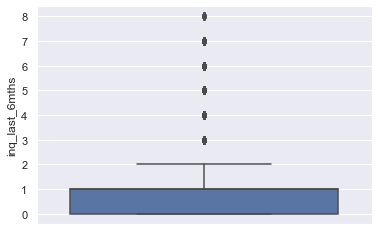

In [166]:
# Below plot indicates the precense of outliers for inq_last_6mths variable
sns.boxplot(y=data['inq_last_6mths'])

<AxesSubplot:ylabel='annual_inc'>

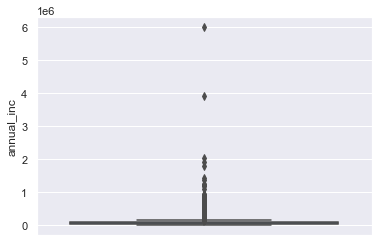

In [167]:
# Below plot indicates the precense of outliers for annual_inc variable
sns.boxplot(y=data['annual_inc'])

In [168]:
# Removing outliers in annual_inc and inq_last_6mths
data = data[data["annual_inc"] < data["annual_inc"].quantile(0.99)]
data = data[data.inq_last_6mths<4]

<AxesSubplot:ylabel='inq_last_6mths'>

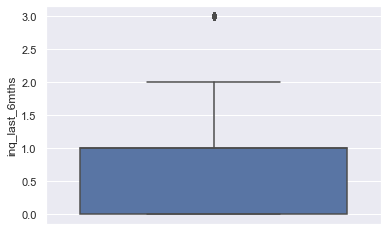

In [169]:
# After removing the outliers
sns.boxplot(y=data['inq_last_6mths'])

<AxesSubplot:ylabel='annual_inc'>

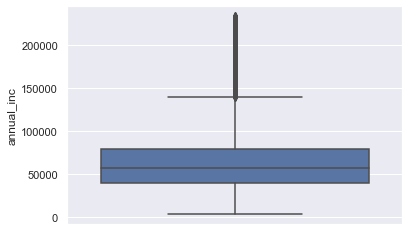

In [170]:
sns.boxplot(y=data['annual_inc'])

#### Univariate and bivariate anaysis

In [171]:
# Univariate and bivariate analysis begins: 
# Quantitative - funded_amt_inv,annual_inc, int_rate, emp_length
# Ordered Categorical variables - term, grade and sub grade, verification status
# Unordered Categorical variables - home_ownership, addr_state, purpose
# Bivariate analysis - Percentage of charged off,emp length

#### funded_amt_inv variable analysis
- Most of the funded loan amount is falling between 5000- 14000

<AxesSubplot:ylabel='funded_amnt_inv'>

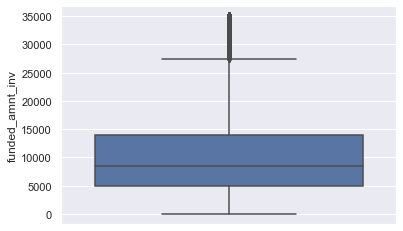

In [172]:
# Univariate Analysis on funded_amt_inv
sns.boxplot(y = data['funded_amnt_inv']) #Most of the funded loan amount is falling between 5000- 14000

#### annual_inc variable analysis
- Most of the annual income falls between 40000- ~70000

<AxesSubplot:ylabel='annual_inc'>

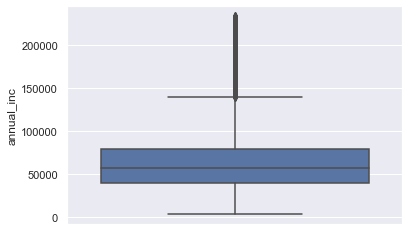

In [173]:
# Univariate Analysis on Annual Income - Quantitative Variables

sns.boxplot(y=data['annual_inc']) 


#Most of the annual income falls between 40000- ~70000


#### int_rate variable analysis
- maximum interest rate are from ~9% to 15%. Rest are outliers.

<AxesSubplot:ylabel='int_rate'>

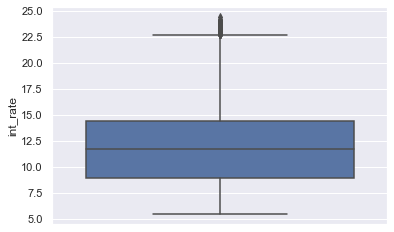

In [174]:
# Univariate analysis on int_rate
sns.boxplot(y=data['int_rate']) 

#maximum interest rate are from ~9% to 15%. Rest are outliers.

#### home_ownership variable analysis

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

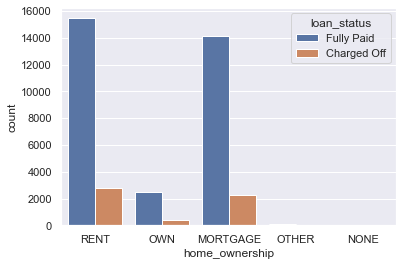

In [175]:
# Analysis of home_ownership and loan_status
sns.countplot(x="home_ownership",data=data,hue='loan_status')

# We see that people having their own home take less loans and less like to be defaulted. However people already on
# mortgage and rented houses tend to default more. But the loan applicants are higher too. 

#### emp_length variable analysis
- maximum number of people who are taking loan are 10 years of experience and above

<AxesSubplot:ylabel='emp_length'>

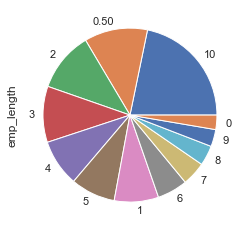

In [176]:
# Univariate Analysis on Emp_Length

all_emp_lengths=data['emp_length'].value_counts()
all_emp_lengths.plot(kind='pie')
# maximum number of people who are taking loan are 10 years of experience and above

#### Understanding loan status (Fully Paid customers versus Defaulters)
- We see considerable amount of defaulters ratio which would result in loss to the investors

<AxesSubplot:ylabel='loan_status'>

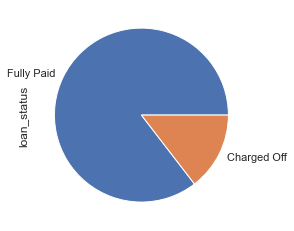

In [177]:
# Univariate analysis on loan status

all_loan_status=data['loan_status'].value_counts()
all_loan_status.plot(kind='pie')

# We see considerable amount of defaulters ratio which would result in loss to the investors

#### Employee years of experience (emp_length) with Loan Status (loan_status)
- So we can see that 10 years of experience people tend to pay the loan on time and do not get charged off a lot. 
- We also notice that employees with less than two years of experience tend to be more defaulters.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

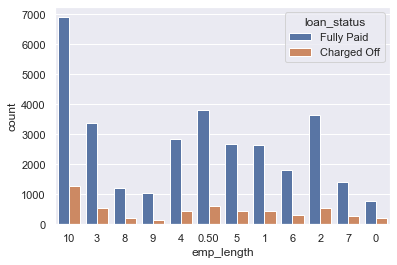

In [178]:
# Analysis of emp_length and loan_status
sns.countplot(x="emp_length",data=data,hue='loan_status')

# So we can see that 10 years of experience people tend to pay the loan on time and do not get charged off a lot. 
# We also notice that employees with less than two years of experience tend to be more defaulters.

#### Bivariate Analysis : Charged off percentage vs emp length
- This proves the hypothesis that people with less than 2years of experience tend to default more than others. 

<AxesSubplot:xlabel='emp_length'>

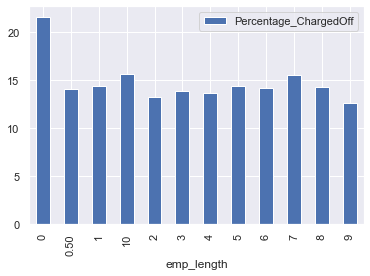

In [179]:
#Creating a new DF object by Grouping by loan status and emp length. Since this returns an object, needs to be unstacked
# and reindexed.

emp_length_grpby = data.groupby(['emp_length', 'loan_status'],as_index=True).loan_status.count().unstack().reset_index()

totalLoanStatus = emp_length_grpby['Charged Off'] + emp_length_grpby['Fully Paid'] 
emp_length_grpby['Percentage_ChargedOff'] = (emp_length_grpby['Charged Off'] / totalLoanStatus) * 100

# plotting on the df directly. Not using sns
emp_length_grpby.plot(kind='bar',x='emp_length',y='Percentage_ChargedOff')

# This proves the hypothesis that people with less than 2years of experience tend to default more than others. 

#### Analysis of loan term affecting the number of defaulters ratio
- people taking loan for 60 months have more chances of being charged off.

<AxesSubplot:xlabel='term', ylabel='count'>

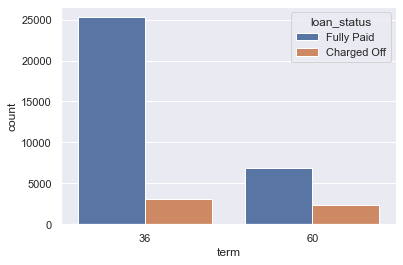

In [180]:
#Univariate analysis: Loan repayment term

sns.countplot(x="term",data=data,hue='loan_status')

# people taking loan for 60 months have more chances of being charged off.

#### Verification Status field analysis

Not Verified       16364
Verified           11831
Source Verified     9439
Name: verification_status, dtype: int64


<AxesSubplot:xlabel='verification_status', ylabel='count'>

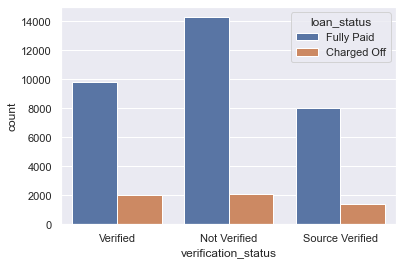

In [181]:
#univariate analysis: Verification status. 
all_verification_status=data['verification_status'].value_counts()
print(all_verification_status)
sns.countplot(x="verification_status",data=data,hue='loan_status')

#looks like verification status does not really matter a lot. 


#### Analysis on variable 'purpose' on the loan
- debt_consolidation and credit card are the major purposes. We can also see how many are charged off for these 2 purposes.

<AxesSubplot:ylabel='purpose'>

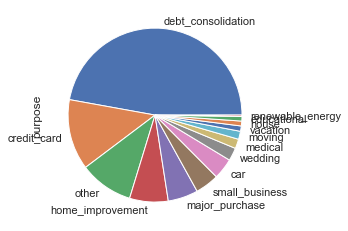

In [182]:
# Univariate Analysis - Purpose of loan

all_loan_purpose=data['purpose'].value_counts()
all_loan_purpose.plot(kind='pie')

# debt_consolidation and credit card are the major purposes. We can also see how many are charged off for these 2 purposes. 

#### Purpose of the loan compared with loan status
- debt_consolidation,credit card and other is the purpose where the charged off numbers are extremely high.

<AxesSubplot:xlabel='count', ylabel='purpose'>

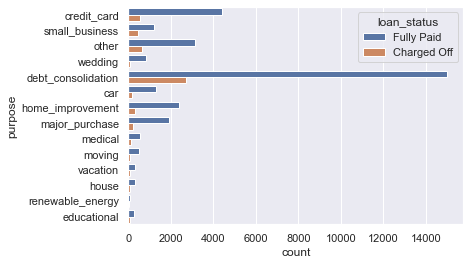

In [183]:
# Checking how many are charged majorly for credit card and debt_consolidation
sns.countplot(y="purpose",data=data,hue='loan_status')
# debt_consolidation,credit card and other is the purpose where the charged off numbers are extremely high.

#### Analysis of good customers and defaulters with respect to state code (addr_state)
- The graph indicates fully paid customers with defaulters for each state code.
- We see FL NJ, MD etc have higher ratio of defaulters w.r.t combined borrowers when compared to other states

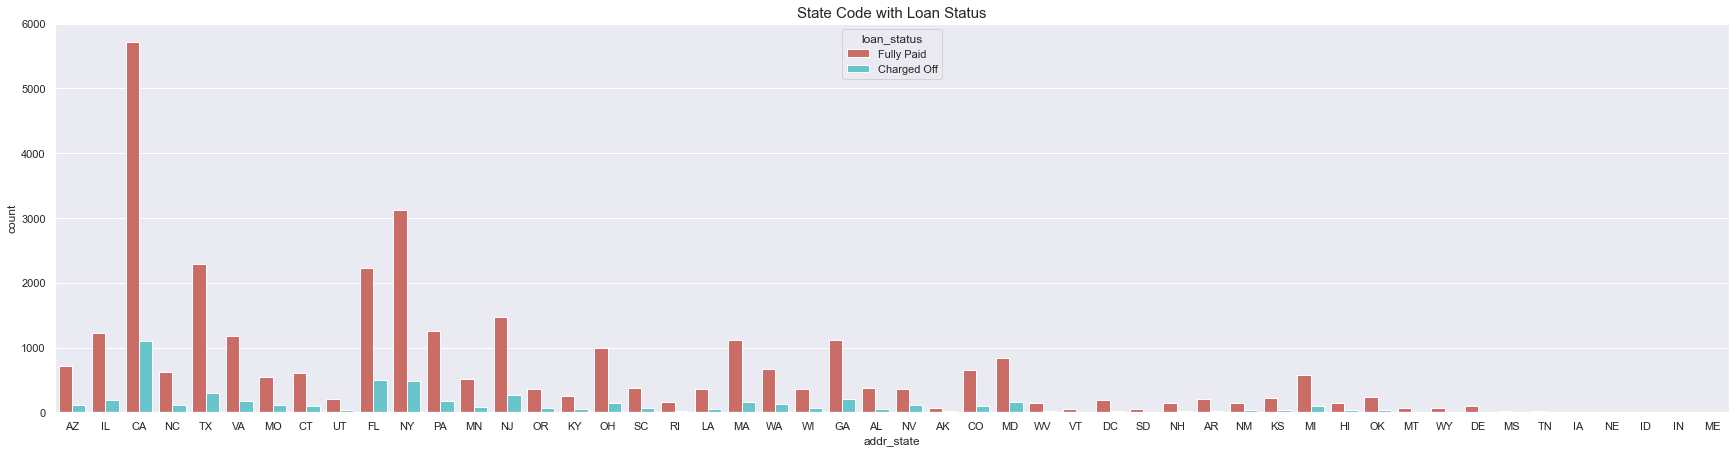

In [184]:
df_good = data[data["loan_status"] == 'Fully Paid']
df_bad = data[data["loan_status"] == 'Charged Off']

fig, ax = plt.subplots( figsize=(30,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g2 = sns.countplot(x="addr_state",data=data, 
              palette="hls", ax=ax, 
              hue = "loan_status")
g2.set_title("State Code with Loan Status", fontsize=15)
g2.set_xlabel("addr_state")
plt.show()

# The graph indicates fully paid customers with defaulters for each state code.
# We see FL NJ, MD etc have higher ratio of defaulters w.r.t combined borrowers when compared to other states

#### Analysing borrowers with number of inquiries in last 6 months variable (inq_last_6mths)
- We see that customers with 2 or 3 inquiries made in last 6 months tend to have more defaulters

C:\Users\sravindranatha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\sravindranatha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



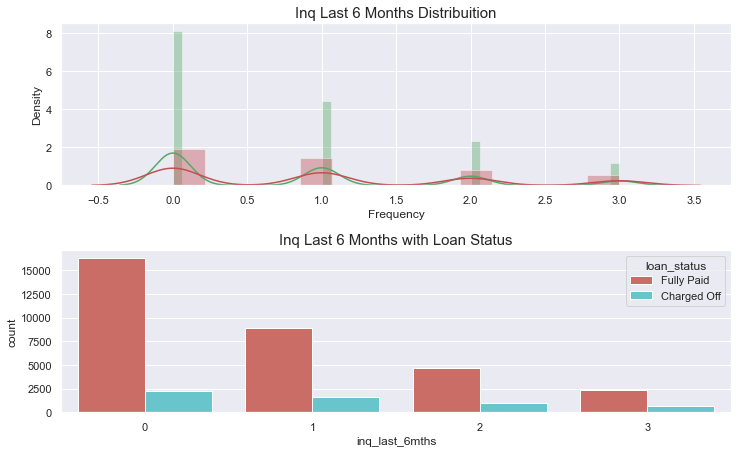

In [185]:
df_good = data[data["loan_status"] == 'Fully Paid']
df_bad = data[data["loan_status"] == 'Charged Off']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["inq_last_6mths"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["inq_last_6mths"], ax=ax[0], 
             color='r')
g1.set_title("Inq Last 6 Months Distribuition", fontsize=15)
g1.set_xlabel("Inq Last 6 Months")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="inq_last_6mths",data=data, 
              palette="hls", ax=ax[1], 
              hue = "loan_status")
g2.set_title("Inq Last 6 Months with Loan Status", fontsize=15)
g2.set_xlabel("inq_last_6mths")
plt.show()


# We see that customers with 2 or 3 inquiries made in last 6 months tend to have more defaulters


#### Analyzing loan amount, approved amount and investors funded amount for each term and comparing with loan status
- In all three types of amount, we see more chances of Charged off for 60 term loans

In [186]:
#First plot
tr0 = go.Bar(
    x = data[data["loan_status"]== 'Fully Paid']["term"].value_counts().index.values,
    y = data[data["loan_status"]== 'Fully Paid']["term"].value_counts().values,
    name='Good'
)

#First plot 2
tr1 = go.Bar(
    x = data[data["loan_status"]== 'Charged Off']["term"].value_counts().index.values,
    y = data[data["loan_status"]== 'Charged Off']["term"].value_counts().values,
    name="Defaulted"
)

#Second plot
tr2 = go.Box(
    x = data[data["loan_status"]== 'Fully Paid']["term"],
    y = data[data["loan_status"]== 'Fully Paid']["funded_amnt_inv"],
    name=tr0.name
)

#Second plot 2
tr3 = go.Box(
    x = data[data["loan_status"]== 'Charged Off']["term"],
    y = data[data["loan_status"]== 'Charged Off']["funded_amnt_inv"],
    name=tr1.name
)



#Third plot
tr4 = go.Box(
    x = data[data["loan_status"]== 'Fully Paid']["term"],
    y = data[data["loan_status"]== 'Fully Paid']["loan_amnt"],
    name=tr0.name
)

#Third plot 2
tr5 = go.Box(
    x = data[data["loan_status"]== 'Charged Off']["term"],
    y = data[data["loan_status"]== 'Charged Off']["loan_amnt"],
    name=tr1.name
)

#Fourth plot
tr6 = go.Box(
    x = data[data["loan_status"]== 'Fully Paid']["term"],
    y = data[data["loan_status"]== 'Fully Paid']["funded_amnt"],
    name=tr0.name
)

#Fourth plot 2
tr7 = go.Box(
    x = data[data["loan_status"]== 'Charged Off']["term"],
    y = data[data["loan_status"]== 'Charged Off']["funded_amnt"],
    name=tr1.name
)

fig = make_subplots(rows=2, cols=2, 
                        subplot_titles=('Term', 'funded_amnt_inv by term','loan_amnt by term','funded_amnt by term'))

fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)
fig.append_trace(tr3, 1, 2)
fig.append_trace(tr4, 2, 1)
fig.append_trace(tr5, 2, 1)
fig.append_trace(tr6, 2, 2)
fig.append_trace(tr7, 2, 2)

fig['layout'].update(height=800, width=800, title='Term Distribuition', boxmode='group')
py.iplot(fig, filename='term-subplot')

# In all three types of amount, we see more chances of Charged off for 60 term loans